МІНІСТЕРСТВО ОСВІТИ І НАУКИ, МОЛОДІ ТА СПОРТУ УКРАЇНИ
НАЦІОНАЛЬНИЙ ТЕХНІЧНИЙ УНІВЕРСИТЕТ УКРАЇНИ
«КИЇВСЬКИЙ ПОЛІТИХНІЧНИЙ ІНСТИТУТ ІМ.ІГОРЯ СІКОРСЬКОГО»
ФІЗИКО-ТЕХНІЧНИЙ ІНСТИТУТ


Лабораторна робота №2
«Геометричні перетворення координат у просторі»
Варіант 9





Виконав:                                                                     Студент 2 курсу
     Групи ФІ-21
Климентьєв Максим




Київ 2024

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
%matplotlib widget
import numpy as np
import copy

# ЗАВДАННЯ ДО ЛАБОРАТОРНОЇ РОБОТИ

## 1. Ознайомитись з теоретичними відомостями до лабораторної роботи. Дослідити кожне перетворення (перетворення, масштабування, поворот, відображення тощо) та їхні комбінації просторі. Ознайомитись з матеріалом, який віднситься до проектування об’єктів на площину.

In [2]:
class Cube:
    def __init__(self, starting_point:list[float, float, float], cube_edge_len:float):
        # Задаємо координати вершин куба
        close_right_down = [starting_point[0], starting_point[1], starting_point[2]] #  [2, 2, -2]
        far_right_down = [starting_point[0] + cube_edge_len, starting_point[1], starting_point[2]] # [4, 2, -2]
        close_right_up = [starting_point[0], starting_point[1], starting_point[2] + cube_edge_len] # [2, 2, 0]
        far_right_up = [starting_point[0] + cube_edge_len, starting_point[1], starting_point[2] + cube_edge_len] # [4, 2, 0]
        close_left_down = [starting_point[0], starting_point[1] + cube_edge_len, starting_point[2]] # [2, 4, -2]
        far_left_down = [starting_point[0] + cube_edge_len, starting_point[1] + cube_edge_len, starting_point[2]] # [4, 4, -2]
        close_left_up = [starting_point[0], starting_point[1] + cube_edge_len, starting_point[2] + cube_edge_len] # [2, 4, 0]
        far_left_up = [starting_point[0] + cube_edge_len, starting_point[1] + cube_edge_len, starting_point[2] + cube_edge_len] # [4, 4, 0]
        
        self.array = np.array([
            close_right_down, #0
            close_right_up, #1
            close_left_up, #2
            close_left_down, #3
            far_right_down, #4
            far_right_up, #5
            far_left_up, #6
            far_left_down]) #7
        
        self.array_4d = np.column_stack((self.array, np.array([1]*self.array.shape[0])))
        
        self.system_coordinates = np.array([
            [[-10, -abs(starting_point[0])+abs(+cube_edge_len)][abs(starting_point[0])+abs(+cube_edge_len)>=10], 0, 0],
            [[10, abs(starting_point[0])+abs(+cube_edge_len)][abs(starting_point[0])+abs(+cube_edge_len)>=10], 0, 0],
            [0, [-10, -abs(starting_point[0])+abs(+cube_edge_len)][abs(starting_point[1])+abs(+cube_edge_len)>=10], 0],
            [0, [10, abs(starting_point[0])+abs(+cube_edge_len)][abs(starting_point[1])+abs(+cube_edge_len)>=10], 0],
            [0, 0, [-10, -abs(starting_point[0])+abs(+cube_edge_len)][abs(starting_point[2])+abs(+cube_edge_len)>=10]],
            [0, 0, [10, abs(starting_point[0])+abs(+cube_edge_len)][abs(starting_point[2])+abs(+cube_edge_len)>=10]]])
    
    def update_array_4d(self):
        self.array_4d = np.column_stack((self.array, np.array([1]*self.array.shape[0])))
    
    def create_faces(self):
        # Initialize a list of vertex coordinates for each face
        self.faces = [np.zeros([5,3])]*6
        # right face
        self.faces[0] = np.array([
            self.array[0], 
            self.array[1], 
            self.array[2], 
            self.array[3], 
            self.array[0], 
        ])
        # left face
        self.faces[1] = np.array([
            self.array[4],
            self.array[5],
            self.array[6],
            self.array[7],
            self.array[4],
        ])
        # back Face
        self.faces[2] = np.array([
            self.array[0],
            self.array[1],
            self.array[5],
            self.array[4],
            self.array[0],
        ])
        # front Face
        self.faces[3] = np.array([
            self.array[2],
            self.array[3],
            self.array[7],
            self.array[6],
            self.array[2],
        ])
        # top face
        self.faces[4] = np.array([
            self.array[5],
            self.array[6],
            self.array[2],
            self.array[1],
            self.array[5],
        ])
        # bottom face
        self.faces[5] = np.array([
            self.array[4],
            self.array[7],
            self.array[3],
            self.array[0],
            self.array[4],
        ])
    
    def plot3d(self, show_standart=False, line=None):
        self.create_faces()
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')

        # ax.scatter(cube[:, 0], cube[:, 1], cube[:, 2])
        ax.plot(self.system_coordinates[:, 0][:2], self.system_coordinates[:, 1][:2], self.system_coordinates[:, 2][:2])
        ax.plot(self.system_coordinates[:, 0][2:4], self.system_coordinates[:, 1][2:4], self.system_coordinates[:, 2][2:4])
        ax.plot(self.system_coordinates[:, 0][4:6], self.system_coordinates[:, 1][4:6], self.system_coordinates[:, 2][4:6])
        
        if line != None:
            ax.plot(line.kx, line.ky, line.kz)
        
        # plotting cube
        ax.add_collection3d(Poly3DCollection(self.faces, facecolors='cyan', linewidths=1, edgecolors='k', alpha=.25))
        if show_standart:
            ax.add_collection3d(Poly3DCollection(self.old_faces, facecolors='red', linewidths=1, edgecolors='k', alpha=.25))
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        
        plt.show()
    
    # Scaling
    def scale(self, num):
        if type(num) == int or type(num) == float:
            for row_index in range(self.array.shape[0]):
                self.array[row_index] = self.array[row_index] * np.matrix([
                    [num, 0, 0],
                    [0, num, 0],
                    [0, 0, num]
            ])
        elif type(num) == list and len(num) == 3:
            for row_index in range(self.array.shape[0]):
                self.array[row_index] = self.array[row_index] * np.matrix([
                    [num[0], 0, 0],
                    [0, num[1], 0],
                    [0, 0, num[2]]
            ])
    
    def rotate(self):
        pass
    
    def copy(self):
        self.old_faces = self.faces.copy()
        return copy.deepcopy(self)

In [3]:
class Line:
    def __init__(self, point:list[float, float, float], vector:list[float, float, float]):
        self.point = point
        self.vector = vector
        self.x = np.linspace(-10, 10)
        self.kx = (self.x - self.point[0])/self.vector[0]
        self.ky = self.vector[1]*self.kx + self.point[1]
        self.kz = self.vector[2]*self.kx + self.point[2]

## 2. Задати куб через його вершини. Здійснити масштабування куба (збільшення, зменшення у кілька разів). Записати відповідну матрицю.

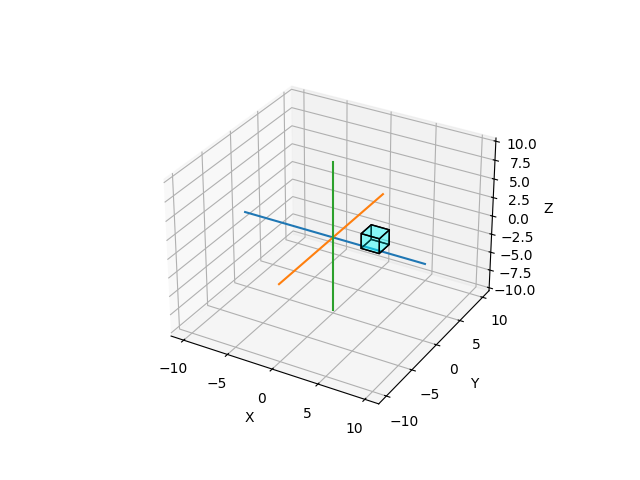

In [4]:
cube = Cube([2, 2, -2], 2)
cube.plot3d()

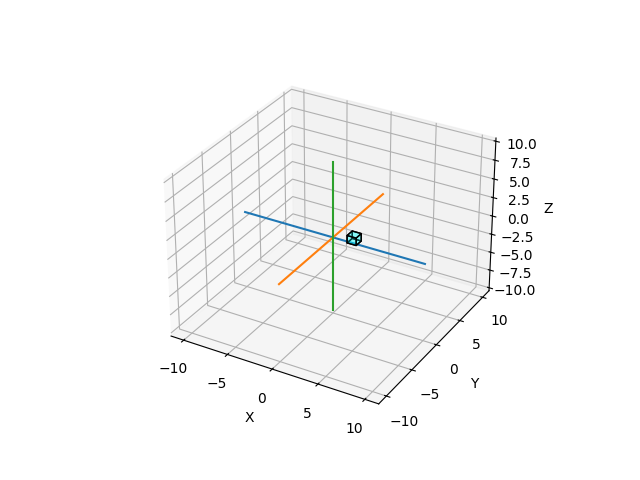

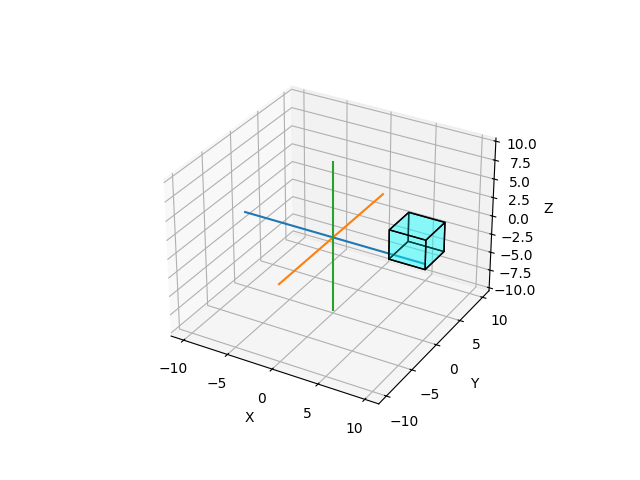

In [5]:
cube_scale_05 = cube.copy()
cube_scale_05.scale(0.5)
cube_scale_05.plot3d()

cube_scale_2 = cube.copy()
cube_scale_2.scale(2)
cube_scale_2.plot3d()

## 3. Отриманий результат з попереднього пункту симетрично відобразити відносно початку координат, відносно однієї з координатних площин у тривимірній декартовій системі координат (простір).

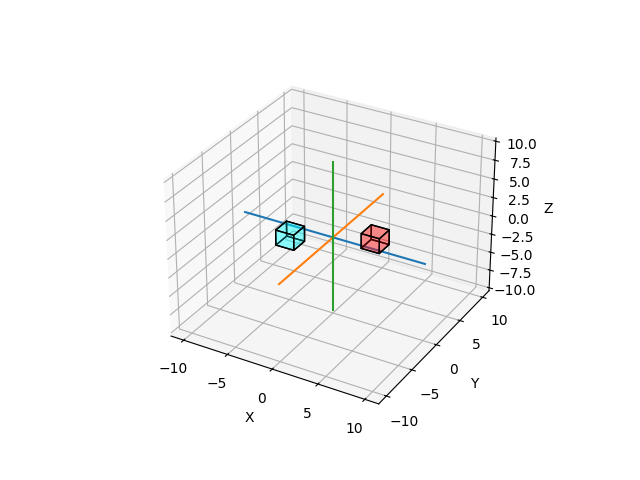

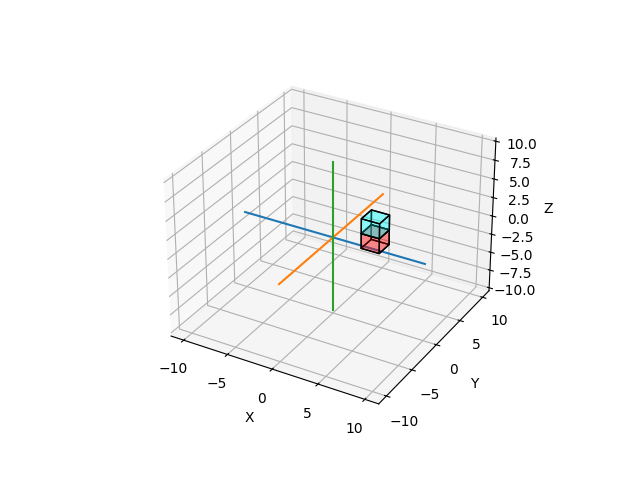

In [6]:
cube_xyz = cube.copy()
cube_xyz.scale([-1, -1, -1])
cube_xyz.plot3d(True)

cube_z = cube.copy()
cube_z.scale([1, 1, -1])
cube_z.plot3d(True)

## 4. Задати пряму як у прикладі 1 даної лабораторної роботи. Здійснити поворот куба відносно прямої на деякий кут φ. Вказати перетворення, які необхідні для одержання такого результату.

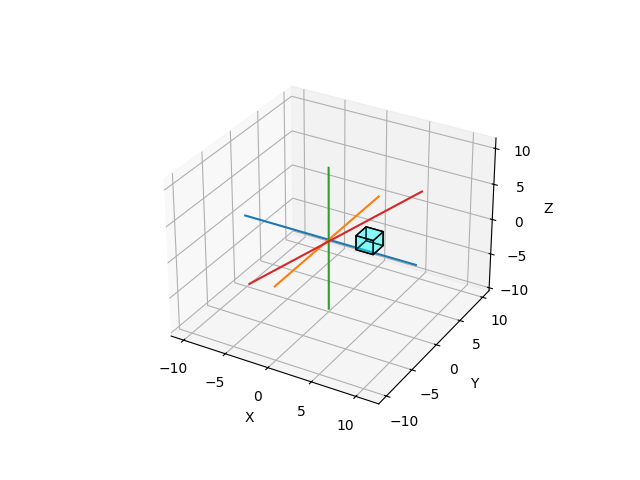

In [17]:
line = Line([-1, -1, 0],[1, 0, 1])
cube.plot3d(line=line)

## 5. Задати площину, як у прикладі 2, здійснити симетрію куба відносно площини, вказати всі математичні перетворення, показати кінцевий результат, який відповідає вимогам задачі. Записати відповідні математичні перетворення.

## 6. (для студентів, які навчаються на кафедрі ММАД) Запропонувати інший набір перетворень для отримання результатів, які наведені у прикладі 2 даної лабораторної роботи. Тобто здійснити інші перетворення за загальним підходом (симетрія, поворот, перенесення), показати їх математично.

## 7. (для студентів, які навчаються на кафедрі ММАД) Запропонувати інший набір перетворень для отримання результатів, які наведені у прикладі 2 даної лабораторної роботи. Тобто здійснити інші перетворення за загальним підходом (симетрія, поворот, перенесення), показати їх математично.

## 8. (для студентів, які навчаються на кафедрі ММАД) Навести алгоритм з математичними перетвореннями для побудови симетрії відносно площини на основі знань з аналітичної геометрії. Порівняти результати (програмно)

## 9. До пунктів 2–8 розробити програмне забезпечення (студентам кафедри ММЗІ для пунктів 2–5). Навести результат виконання кожного пункту.

## 10. (для всіх студентів) Взяти той самий куб, який був поданий у попередніх пунктах. Здійснити ортогональне проектування даного кубу на площину загального виду, яка не паралельна жодній з координатних площин. Вказати відповідні математичні перетворення, розробити відповідне програмне забезпечення.